# Load and Explore Data

Load the support ticket dataset from a CSV file or API, and perform initial exploration including checking data types, missing values, and basic statistics.

In [18]:
# Load and Explore Data
import pandas as pd

# Load the dataset from the data directory
df = pd.read_csv('../data/all_tickets_processed_improved_v3.csv')

# Display first few rows
print(df.head())

# Check data types
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

# Basic statistics
print(df.describe())

                                            Document    Topic_group
0  connection with icon icon dear please setup ic...       Hardware
1  work experience user work experience user hi w...         Access
2  requesting for meeting requesting meeting hi p...       Hardware
3  reset passwords for external accounts re expir...         Access
4  mail verification warning hi has got attached ...  Miscellaneous
Document       str
Topic_group    str
dtype: object
Document       0
Topic_group    0
dtype: int64
                                                 Document Topic_group
count                                               47837       47837
unique                                              47837           8
top     connection with icon icon dear please setup ic...    Hardware
freq                                                    1       13617


In [19]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
    return ' '.join(tokens)

df['clean_text'] = df['Document'].apply(clean_text)

df[['Document', 'clean_text']].head()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Document,clean_text
0,connection with icon icon dear please setup ic...,connection icon icon dear please setup icon pe...
1,work experience user work experience user hi w...,work experience user work experience user work...
2,requesting for meeting requesting meeting hi p...,requesting meeting requesting meeting please h...
3,reset passwords for external accounts re expir...,reset passwords external accounts expire days ...
4,mail verification warning hi has got attached ...,mail verification warning got attached please ...


In [20]:
def assign_priority(text):
    text = text.lower()
    
    high_keywords = ['urgent', 'not working', 'error', 'failed', 'down', 'cannot', 'unable', 'password', 'reset']
    
    for word in high_keywords:
        if word in text:
            return 'High'
    
    if len(text) > 120:
        return 'Medium'
    
    return 'Low'

df['priority'] = df['Document'].apply(assign_priority)

df['priority'].value_counts()

priority
Medium    23130
Low       12617
High      12090
Name: count, dtype: int64

# Preprocess Text Data

Clean and preprocess the text data by removing stop words, punctuation, and performing tokenization and lemmatization using libraries like NLTK or spaCy.

In [21]:
# Preprocess Text Data
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Assuming the text column is 'Document'
df['processed_text'] = df['Document'].apply(preprocess_text)

print(df[['Document', 'processed_text']].head())

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                            Document  \
0  connection with icon icon dear please setup ic...   
1  work experience user work experience user hi w...   
2  requesting for meeting requesting meeting hi p...   
3  reset passwords for external accounts re expir...   
4  mail verification warning hi has got attached ...   

                                      processed_text  
0  connection icon icon dear please setup icon pe...  
1  work experience user work experience user hi w...  
2  requesting meeting requesting meeting hi pleas...  
3  reset password external account expire day hi ...  
4  mail verification warning hi got attached plea...  


# Feature Extraction

Convert text data into numerical features using techniques such as TF-IDF vectorization or word embeddings with scikit-learn or transformers.

In [22]:
# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['processed_text'])

# Assuming the target column is 'Topic_group'
y = df['Topic_group']  # Adjust as needed

print(X.shape)
print(y.value_counts())

(47837, 5000)
Topic_group
Hardware                 13617
HR Support               10915
Access                    7125
Miscellaneous             7060
Storage                   2777
Purchase                  2464
Internal Project          2119
Administrative rights     1760
Name: count, dtype: int64


# Train Classification Model

Train a machine learning model, such as a logistic regression or random forest classifier, on the preprocessed data using scikit-learn.

In [23]:
# Train Classification Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

print("Model trained successfully.")

Model trained successfully.


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Evaluate Model Performance

Evaluate the trained model using metrics like accuracy, precision, recall, and F1-score, and visualize results with confusion matrices.

Accuracy: 0.8465719063545151
Precision: 0.8508192279852631
Recall: 0.8465719063545151
F1 Score: 0.8468397355123587


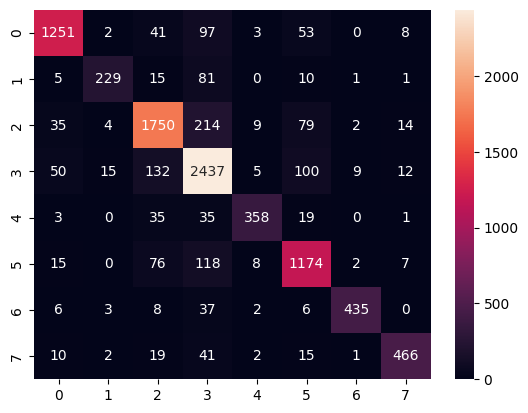

In [24]:
# Evaluate Model Performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# Make Predictions on New Tickets

Use the trained model to classify new support tickets by preprocessing input text and generating predictions.

In [25]:
# Make Predictions on New Tickets
def predict_ticket(text):
    processed = preprocess_text(text)
    vectorized = vectorizer.transform([processed])
    prediction = model.predict(vectorized)
    return prediction[0]

# Example
new_ticket = "My computer is not starting up."
print(f"Predicted category: {predict_ticket(new_ticket)}")

Predicted category: Hardware
